In [298]:
import pandas as pd
import numpy as np
import seaborn as sb

data = pd.read_csv("Masters 2016 - Sheet4.csv")
del data['DK']
del data['Earnings']         
data.head()

,Golfer,SG_Total,Hard_Course,Par 72,Long_Course,Bentgrass,Specialist,Majors,Windy Rds,Score,Total
0,Danny Willett,1.020,-0.132,0.107,-0.039,-0.059,-0.031,-0.411,0.000,24,4.519593
1,Lee Westwood,0.605,0.202,-0.034,0.039,-0.041,0.041,0.181,-0.169,21,3.518143
2,Jordan Spieth,1.732,0.617,0.322,0.278,0.033,0.313,1.115,0.401,21,3.358561
3,Paul Casey,1.036,0.235,-0.202,-0.046,-0.114,-0.032,-0.413,0.373,20,3.178168
4,Dustin Johnson,1.670,0.302,0.058,-0.153,-0.039,0.042,0.607,0.150,20,3.365135


In [299]:
data.columns = ['Golfer', 'SG_Total', 'Hard_Course', 'Par_72', 'Long_Course','Bentgrass', 'Specialist', 'Majors', 'Windy_Rds', 'To_Par', 'Score']

In [300]:
data['MC'] = data['Score'].apply(lambda x: 1 if x > 0 else 0)

In [301]:
data.MC.head()

0    1
1    1
2    1
3    1
4    1
Name: MC, dtype: int64

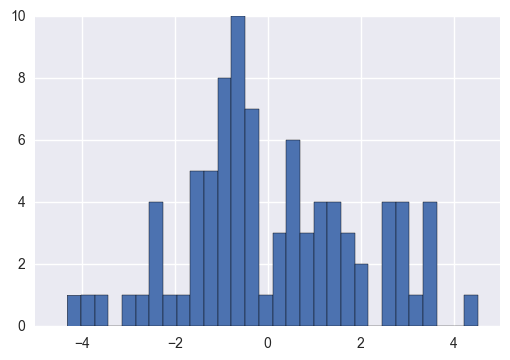

In [302]:
from matplotlib import pyplot as plt
%matplotlib inline
f = data.Score.hist(bins=30)

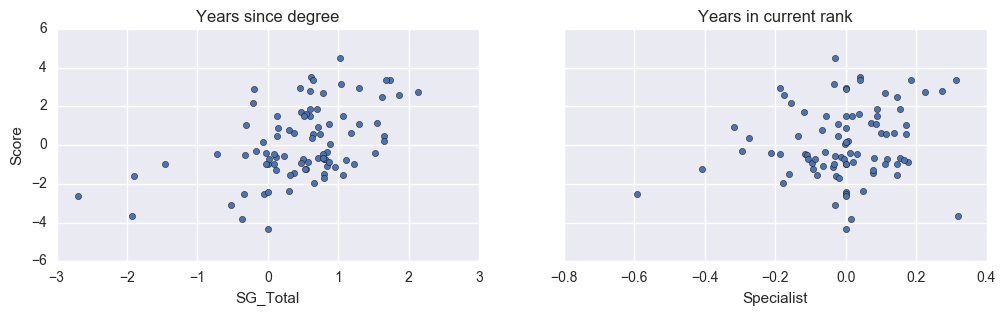

In [303]:

fig, axes = plt.subplots(ncols=2,sharey=True)  #Force both subplots to use the same y axis
f = data.plot(kind='scatter', x='SG_Total', y='Score', ax=axes[0], title="Years since degree", figsize=(12,3))
f = data.plot(kind='scatter', x='Specialist', y='Score', ax=axes[1], title="Years in current rank")

In [304]:
data.corr()

,SG_Total,Hard_Course,Par_72,Long_Course,Bentgrass,Specialist,Majors,Windy_Rds,To_Par,Score,MC
SG_Total,1.000000,0.102683,0.149516,0.156772,-0.183426,0.108239,0.130551,0.158486,0.439779,0.490702,0.387833
Hard_Course,0.102683,1.000000,0.089565,0.188964,-0.124672,0.579049,0.233154,0.348629,0.118916,0.117956,0.079252
Par_72,0.149516,0.089565,1.000000,0.294832,0.046219,0.552896,-0.069397,0.122844,0.137490,0.116280,0.242618
Long_Course,0.156772,0.188964,0.294832,1.000000,0.072332,0.727178,0.295134,0.081728,0.230614,0.241151,0.199647
Bentgrass,-0.183426,-0.124672,0.046219,0.072332,1.000000,0.387729,0.320176,-0.188958,-0.087021,-0.107569,-0.099611
Specialist,0.108239,0.579049,0.552896,0.727178,0.387729,1.000000,0.369717,0.182911,0.187756,0.177026,0.182957
Majors,0.130551,0.233154,-0.069397,0.295134,0.320176,0.369717,1.000000,-0.024092,0.075784,0.087090,-0.058994
Windy_Rds,0.158486,0.348629,0.122844,0.081728,-0.188958,0.182911,-0.024092,1.000000,0.045036,0.109281,0.105241
To_Par,0.439779,0.118916,0.137490,0.230614,-0.087021,0.187756,0.075784,0.045036,1.000000,0.926392,0.870363
Score,0.490702,0.117956,0.116280,0.241151,-0.107569,0.177026,0.087090,0.109281,0.926392,1.000000,0.826297


In [305]:
import statsmodels.formula.api as sm
model = sm.ols(formula="Score ~ SG_Total + Long_Course", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     15.23
Date:                Wed, 05 Apr 2017   Prob (F-statistic):           2.33e-06
Time:                        22:33:56   Log-Likelihood:                -161.93
No. Observations:                  86   AIC:                             329.9
Df Residuals:                      83   BIC:                             337.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.3699      0.206     -1.795      0.076        -0.780     0.040
SG_Total        1.0806      0.221      4.884      0.000         0.641     1.521
Long_Course     1.0606      0.599      1.771      0.080        -0.130     2.252
==============================================================================
Omnibus:                        1.111   Durbin-Watson:                   0.607
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                1.183
Skew:                           0.208   Prob(JB):                        0.554
Kurtosis:                       2.603   Cond. No.                         4.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [307]:
X = data[['Long_Course', 'SG_Total']]
y = data['Score']


In [308]:
model.fit(X,y)
print model.score(X,y)

0.268437300584


In [309]:
model.intercept_

-0.36989816418018379

In [310]:
model.coef_

array([ 1.06063812,  1.08057203])

In [311]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

model.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [312]:
print model.score(X_train,y_train) #Print how high the R^2 is on the training data
print model.score(X_test,y_test)   #Print how high the R^2 is on the test data

0.245196721861
0.338711578161


In [313]:

# Create our X matrix of observations, and y vector of responses
X = data[ ['SG_Total','Specialist'] ]
y = data[ 'Score' ]

In [314]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [315]:
y_pred = model.predict(X)
y_pred
data['Pred_Score'] = model.predict(X)
data[['Golfer', 'Score', 'Pred_Score']]

,Golfer,Score,Pred_Score
0,Danny Willett,4.519593,0.664726
1,Lee Westwood,3.518143,0.318234
2,Jordan Spieth,3.358561,2.001587
3,Paul Casey,3.178168,0.680904
4,Dustin Johnson,3.365135,1.502414
5,J.B. Holmes,3.370230,0.585760
6,Hideki Matsuyama,2.921487,0.727293
7,Matthew Fitzpatrick,2.954040,0.094340
8,Soren Kjeldsen,2.877187,-0.640755
9,Jason Day,2.587812,1.371667


In [316]:
model.score(X,y)

0.25632507291695283

In [317]:

X = data[ ['SG_Total','Long_Course'] ].copy() 
y = data[ 'Score' ].copy()

X['int'] = [1 for x in range(86)] 
X = X[ ['int','SG_Total','Long_Course' ] ]
X.head()


,int,SG_Total,Long_Course
0,1,1.020,-0.039
1,1,0.605,0.039
2,1,1.732,0.278
3,1,1.036,-0.046
4,1,1.670,-0.153


In [318]:
betas = np.dot( np.dot( np.linalg.inv(X.transpose().dot(X)),X.transpose()) , y)
betas

array([-0.36989816,  1.08057203,  1.06063812])

In [319]:
y_pred = X.dot(betas)

In [320]:
sse = np.sum(np.power(y_pred - y,2))
sst = np.sum(np.power(y - np.mean(y),2))


score = 1.0 - sse/sst
score

0.2684373005843288

In [321]:
print "Train Score:", model.score(X_train,y_train)
print "Test Score:", model.score(X_test,y_test)

Train Score: 0.214805915138
Test Score: 0.193126021387


In [322]:
from sklearn import linear_model

In [323]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

model = linear_model.LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
print "Train Score:", model.score(X_train,y_train)
print "Test Score:", model.score(X_test,y_test)

Train Score: 0.224460714444
Test Score: 0.33677305022


In [324]:
# Running once gives us a lot of variance in train/test, let's try cross validation
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
model = linear_model.LinearRegression(fit_intercept=True)

# Instead of cv=5, or cv=10, I use KFold which is an explicit iterator for the data.
# Normally cross_val_score does not shuffle by default. KFold allows shuffling of data
cv_scores = cross_val_score(model,X,y,cv=KFold(len(X),n_folds=10,shuffle=True))

print "Avg CV Score:", cv_scores.mean()

Avg CV Score: 0.193933773432
